Link to code: <https://github.com/jchung2020/jchung2020.github.io/tree/main/posts/perceptron>

Here I will implement three different variations on gradient descent using logistic regression loss: regular gradient descent, stochastic gradient descent, and stochastic gradient descent with momentum.

With gradient descent, I begin with a random guess for the minimizer of the loss function. At each point, I compute the gradient and take a step (whose size is modulated by the stepping size) in that direction. This updates the new guess for the minimum, and I continue until the gradient is close to the zero vector.

For stochastic gradient descent, I use the same general approach but instead divide the data up into random batches. Additionally, I implemented stochastic gradient descent with momentum, which uses the difference between our current and previous guesses for the momentum update to inform the next update on our guess. This ensures that if we have a good guess for the minimizer, we more quickly head in that direction (and more quickly converge).

Starting with simple 2D data:

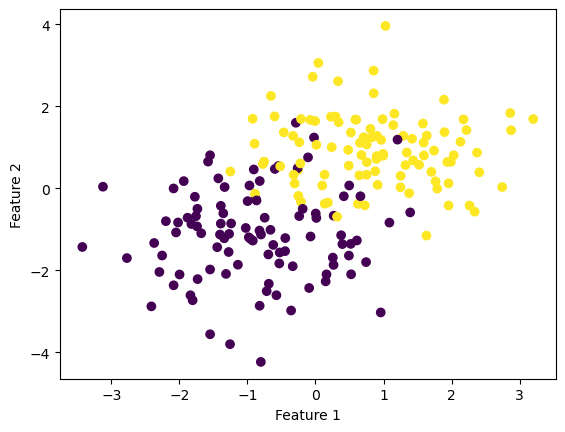

In [29]:
from gradient_descent import LogisticRegression # your source code
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

np.random.seed(123)

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

[Text(0.5, 0, 'Iterations'), Text(0, 0.5, 'Accuracy')]

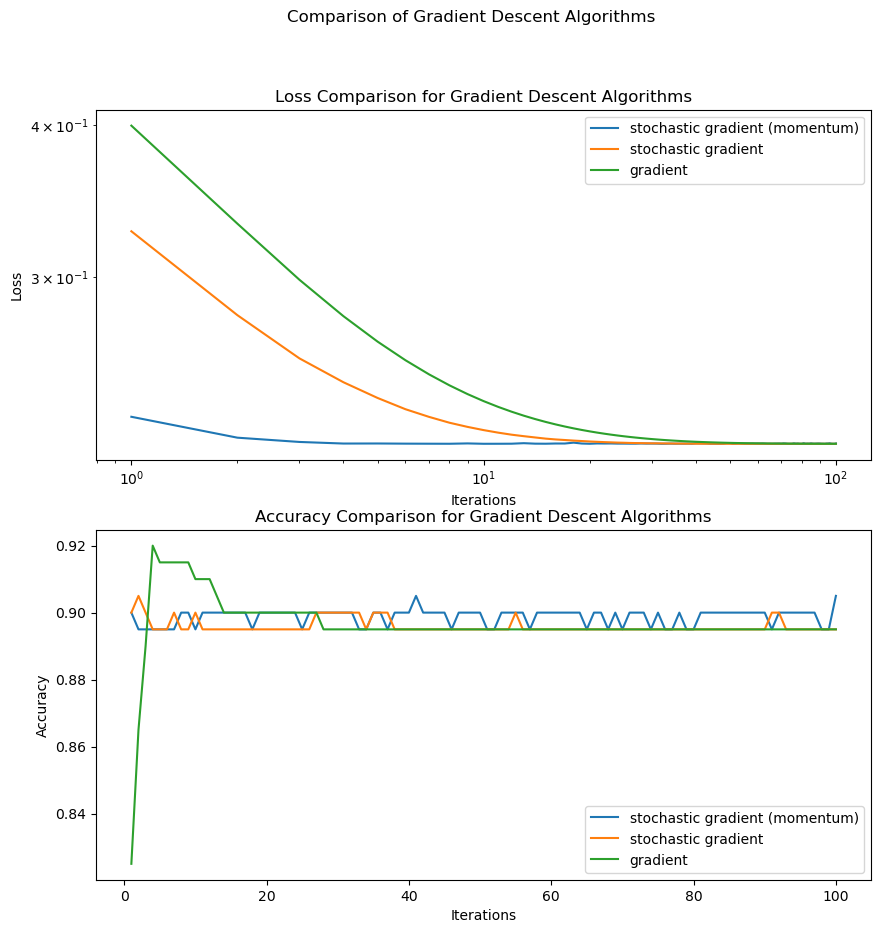

In [30]:
fig, axs = plt.subplots(2, figsize=(10, 10))
fig.suptitle('Comparison of Gradient Descent Algorithms')

#Stochastic Gradient Descent With Momentum
LR_stoch_mom = LogisticRegression()
LR_stoch_mom.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = 0.1)

num_steps = len(LR_stoch_mom.loss_history)
axs[0].plot(np.arange(num_steps) + 1, LR_stoch_mom.loss_history, label = "stochastic gradient (momentum)")
axs[1].plot(np.arange(num_steps) + 1, LR_stoch_mom.history, label = "stochastic gradient (momentum)")

#Stochastic Gradient Descent
LR_stoch = LogisticRegression()
LR_stoch.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = 0.1) 

num_steps = len(LR_stoch.loss_history)
axs[0].plot(np.arange(num_steps) + 1, LR_stoch.loss_history, label = "stochastic gradient")
axs[1].plot(np.arange(num_steps) + 1, LR_stoch.history, label = "stochastic gradient")

#Gradient Descent
LR = LogisticRegression()
LR.fit(X, y, alpha = 1, max_epochs = 100)

num_steps = len(LR.loss_history)
axs[0].plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")
axs[1].plot(np.arange(num_steps) + 1, LR.history, label = "gradient")

axs[0].loglog()

legend = axs[0].legend() 
legend = axs[1].legend() 

axs[0].set_title("Loss Comparison for Gradient Descent Algorithms")
axs[0].set(xlabel = 'Iterations', ylabel= 'Loss')
axs[1].set_title("Accuracy Comparison for Gradient Descent Algorithms")
axs[1].set(xlabel = 'Iterations', ylabel= 'Accuracy')

In this case, notice that stochastic gradient descent with momentum converges fastest, then stochastic gradient descent, then regular gradient descent.

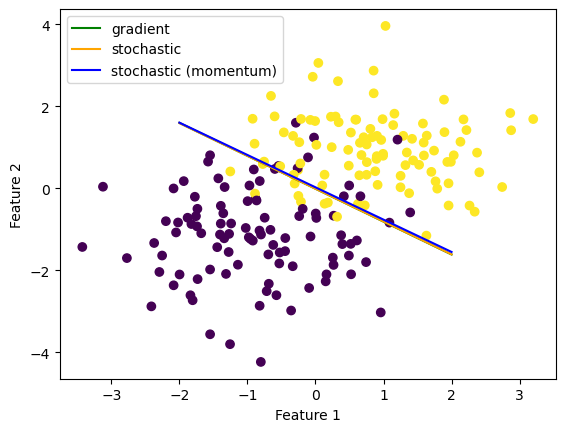

In [31]:
def draw_line(w, x_min, x_max,title,c):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = c,label=title)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2,"gradient","green")
fig = draw_line(LR_stoch.w, -2, 2,"stochastic","orange")
fig = draw_line(LR_stoch_mom.w, -2, 2,"stochastic (momentum)","blue" )

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

legend = plt.legend()

As we can see, the separating lines for all algorithm are quite similar.

## Altering the Stepping Size

Below is a case I show some larger stepping sizes. It is suprisingly robust, however, as even a large stepping size of 30 yields a reasonable loss. Perhaps the gradient is naturally small.

Text(0.5, 1.0, 'Large Stepping Size Comparison on Gradient Descent')

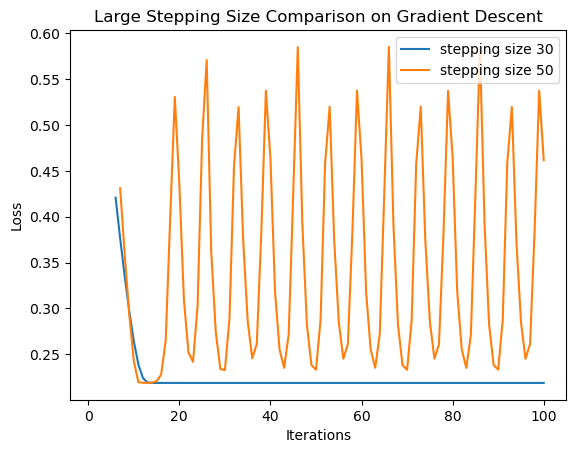

In [35]:
LR = LogisticRegression()
LR.fit(X, y, alpha = 30, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stepping size 30")

LR = LogisticRegression()
LR.fit(X, y, alpha = 50, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stepping size 50")

legend = plt.legend() 
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Large Stepping Size Comparison on Gradient Descent")

As we can see, the loss never converges for a stepping size of 50, as this proves to be too large for proper gradient descent.

## Altering the Batch Size

Here I demonstrate that the batch size can affect how quickly stochastic gradient search will converge.

Text(0.5, 1.0, 'Batch Size Comparison for Stochastic Gradient Descent')

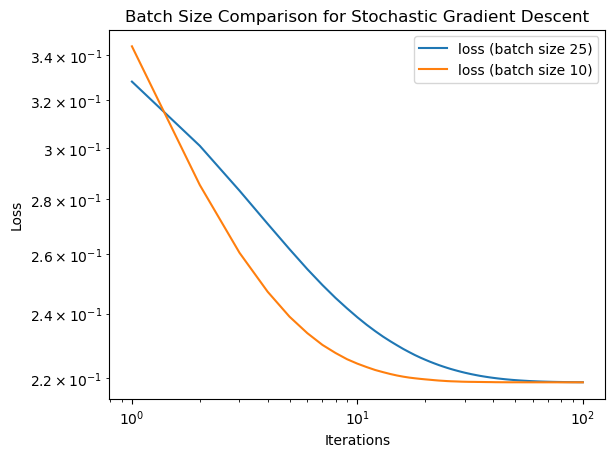

In [36]:
LR1 = LogisticRegression()
LR1.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 25, 
                  alpha = 0.1) 

LR2 = LogisticRegression()
LR2.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = 0.1) 

num_steps = len(LR1.loss_history)

plt.plot(np.arange(num_steps) + 1, LR1.loss_history, label = "loss (batch size 25)")
plt.plot(np.arange(num_steps) + 1, LR2.loss_history, label = "loss (batch size 10)")
#plt.plot(np.arange(num_steps) + 1, LR.history, label = "accuracy")

plt.loglog()

legend = plt.legend() 

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Batch Size Comparison for Stochastic Gradient Descent")

As we can see, a smaller batch size allows for a faster convergence, perhaps because the gradient descent more frequently updates the point of the minimum loss.

## Gradient Descent in Higher Dimensions
Below I have plotted comparisons of the gradient descent algorithms in 10 dimensions. Notice that the convergence is faster for stochastic gradient with momentum. In fact, all the gradient descent algorithms converge quite quickly. 

I initially used random vectors for the centers of the blobs but it seems that the data may be linearly separable (hence the fast convergence). Perhaps in higher dimensions, this method of generating data makes it easier to separate linearly. For this new data set, I randomized a vector to multiply to one data set so they are not as linearly separable.

[Text(0.5, 0, 'Iterations'), Text(0, 0.5, 'Accuracy')]

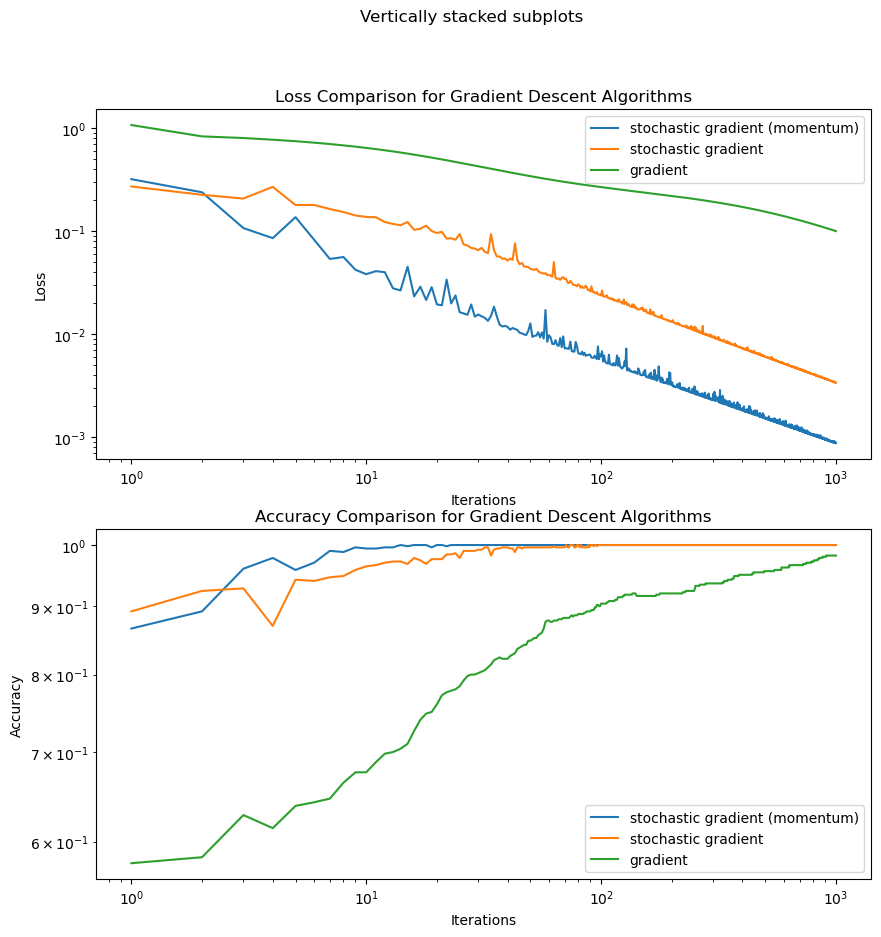

In [37]:
p_features = 11

X, y = make_blobs(n_samples = 500, n_features = p_features - 1, centers = [(1.72810539, -0.76966727, -8.40792394,  0.00943856,  1.33926325,  1.80831111,
 -8.52324258,  1.39576299,  1.50974231, -6.81079023), (1.2532123,   -0.45271457, -4.67704148,  0.00651874,  1.5479877,   0.84146263,
 -3.45566331,  0.62523429,  0.684547,   -2.54964336)])

fig, axs = plt.subplots(2, figsize=(10, 10))
fig.suptitle('Vertically stacked subplots')

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = 0.1) 

num_steps = len(LR.loss_history)
axs[0].plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")
axs[1].plot(np.arange(num_steps) + 1, LR.history, label = "stochastic gradient (momentum)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = 0.1)

num_steps = len(LR.loss_history)
axs[0].plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")
axs[1].plot(np.arange(num_steps) + 1, LR.history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 1000)

num_steps = len(LR.loss_history)
axs[0].plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")
axs[1].plot(np.arange(num_steps) + 1, LR.history, label = "gradient")

#plt.loglog()
axs[0].loglog()
axs[1].loglog()

legend = axs[0].legend() 
legend = axs[1].legend() 

axs[0].set_title("Loss Comparison for Gradient Descent Algorithms")
axs[0].set(xlabel = 'Iterations', ylabel= 'Loss')
axs[1].set_title("Accuracy Comparison for Gradient Descent Algorithms")
axs[1].set(xlabel = 'Iterations', ylabel= 'Accuracy')

Stochastic gradient descent with momentum clearly converges the fastest. Stochastic gradient both with and without momentum appear to fluctuate in the loss (probably as a result of the random batches), but both converge faster than regular gradient descent and even reach 100% accuracy.